In [22]:
from scipy.io import loadmat
from scipy.ndimage import uniform_filter1d
import matplotlib.pyplot as plt
import numpy as np


# Load the .mat file to check its structure
mat_E = loadmat("../dataset/AR1a_E.mat")
mat_W = loadmat("../dataset/AR1a_W.mat")


# Print all the keys in the loaded .mat file to understand its structure
mat_keys = list(mat_E.keys())
mat_keys

['__header__', '__version__', '__globals__', 'csi_buff']

In [23]:
# Extract the 'csi_buff' data from the .mat file
csi_data_E = mat_E["csi_buff"]
csi_data_W = mat_W["csi_buff"]

# Display basic information about the CSI data to understand its structure
csi_data_info_E = {
    "type": type(csi_data_E),
    "shape": csi_data_E.shape,
}
csi_data_info_W = {
    "type": type(csi_data_W),
    "shape": csi_data_W.shape,
}

csi_data_info_E
csi_data_info_W



{'type': numpy.ndarray, 'shape': (83708, 256)}

/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


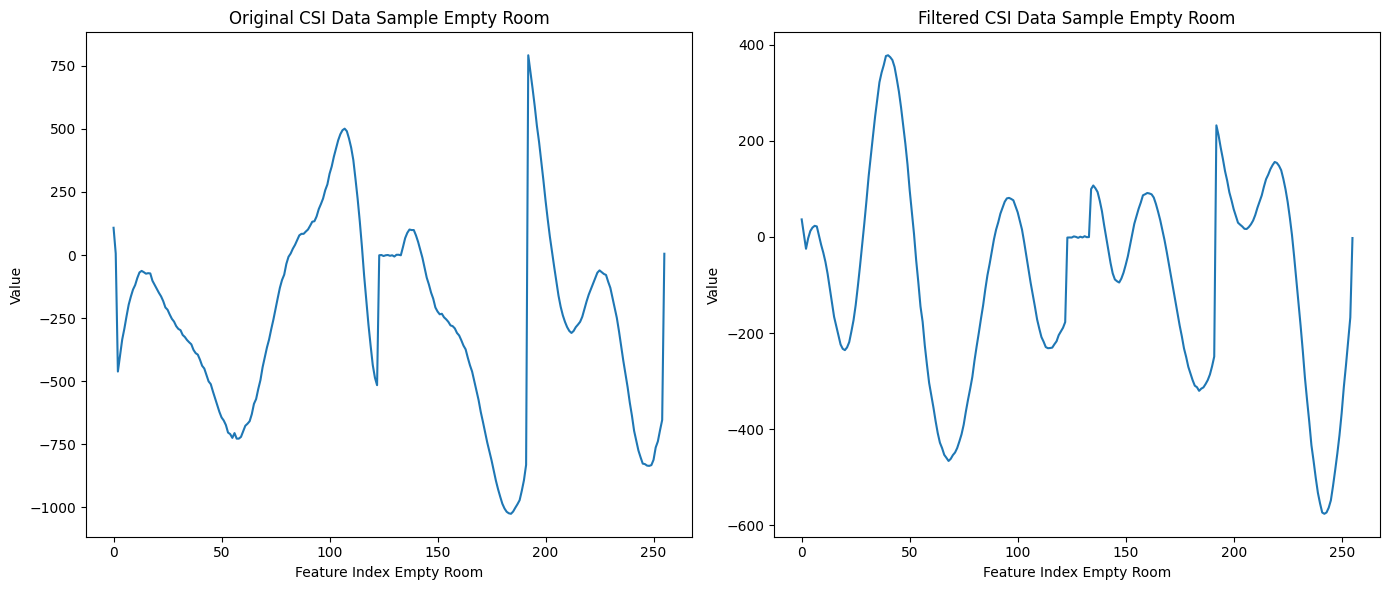

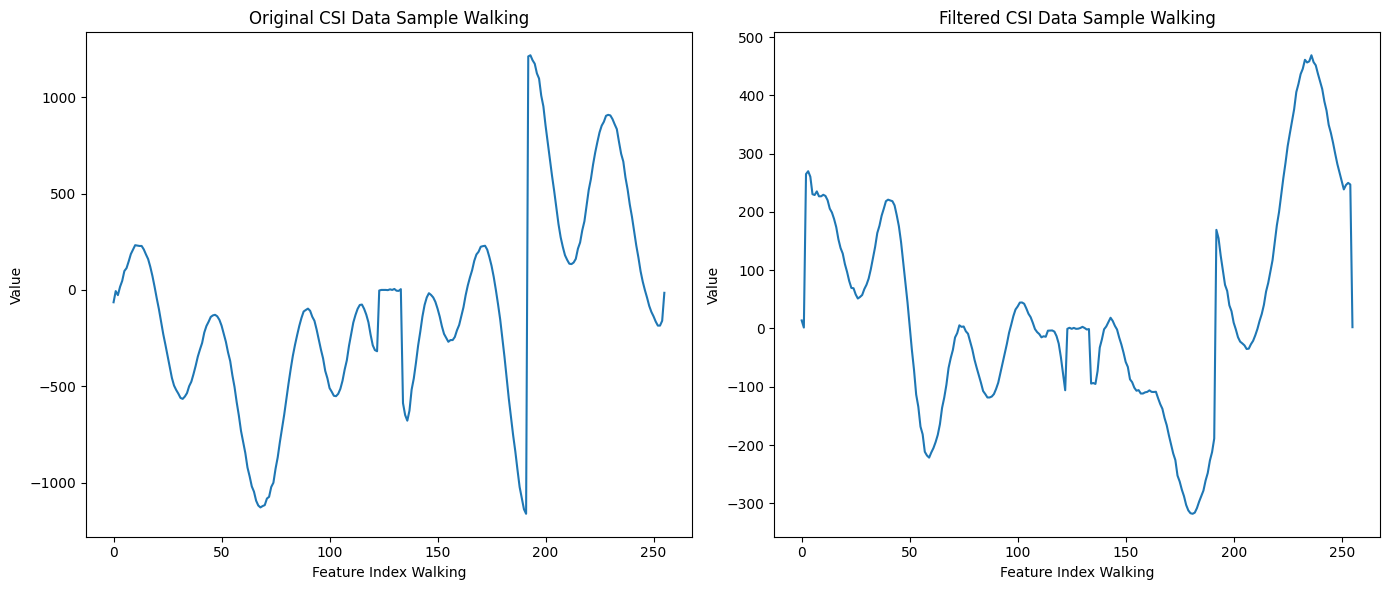

In [24]:
# Apply a moving average filter with a window size of 5
window_size = 5
filtered_csi_data_E = uniform_filter1d(csi_data_E, size=window_size, axis=0)
filtered_csi_data_W = uniform_filter1d(csi_data_W, size=window_size, axis=0)


# Compare a sample of the original and filtered data to see the effect
sample_index = 200  # Arbitrary sample index for illustration

original_sample_E = csi_data_E[sample_index, :]
filtered_sample_E = filtered_csi_data_E[sample_index, :]
original_sample_W = csi_data_W[sample_index, :]
filtered_sample_W = filtered_csi_data_W[sample_index, :]


# Plotting the original and filtered data for comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(original_sample_E)
plt.title("Original CSI Data Sample Empty Room")
plt.xlabel("Feature Index Empty Room")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.plot(filtered_sample_E)
plt.title("Filtered CSI Data Sample Empty Room")
plt.xlabel("Feature Index Empty Room")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(original_sample_W)
plt.title("Original CSI Data Sample Walking")
plt.xlabel("Feature Index Walking")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.plot(filtered_sample_W)
plt.title("Filtered CSI Data Sample Walking")
plt.xlabel("Feature Index Walking")
plt.ylabel("Value")

plt.tight_layout()
plt.show()




In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the filtered CSI data and transform it
standardized_csi_data_E = scaler.fit_transform(filtered_csi_data_E.real)
standardized_csi_data_W = scaler.fit_transform(filtered_csi_data_W.real)

# Check the mean and standard deviation of the first few features to confirm standardization
mean_std_sample_E = {
    "Mean of first feature": np.mean(standardized_csi_data_E[:, 0]),
    "Standard deviation of first feature": np.std(standardized_csi_data_E[:, 0]),
    "Mean of second feature": np.mean(standardized_csi_data_E[:, 1]),
    "Standard deviation of second feature": np.std(standardized_csi_data_E[:, 1])
}
mean_std_sample_W = {
    "Mean of first feature": np.mean(standardized_csi_data_W[:, 0]),
    "Standard deviation of first feature": np.std(standardized_csi_data_W[:, 0]),
    "Mean of second feature": np.mean(standardized_csi_data_W[:, 1]),
    "Standard deviation of second feature": np.std(standardized_csi_data_W[:, 1])
}

print(mean_std_sample_E)
print(mean_std_sample_W)


{'Mean of first feature': 9.159612976722519e-16, 'Standard deviation of first feature': 1.000000000000001, 'Mean of second feature': -8.464167352011423e-16, 'Standard deviation of second feature': 0.9999999999999948}
{'Mean of first feature': -6.529238213153689e-16, 'Standard deviation of first feature': 1.000000000000002, 'Mean of second feature': 1.3819032515619093e-16, 'Standard deviation of second feature': 0.9999999999999553}


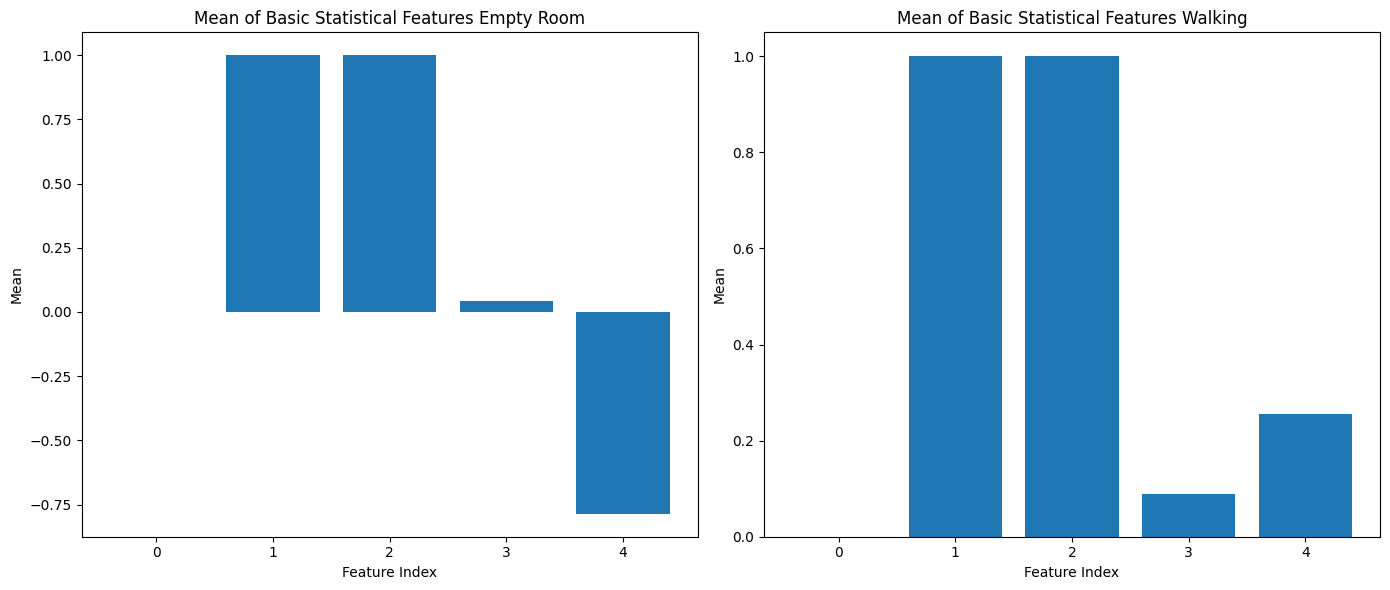

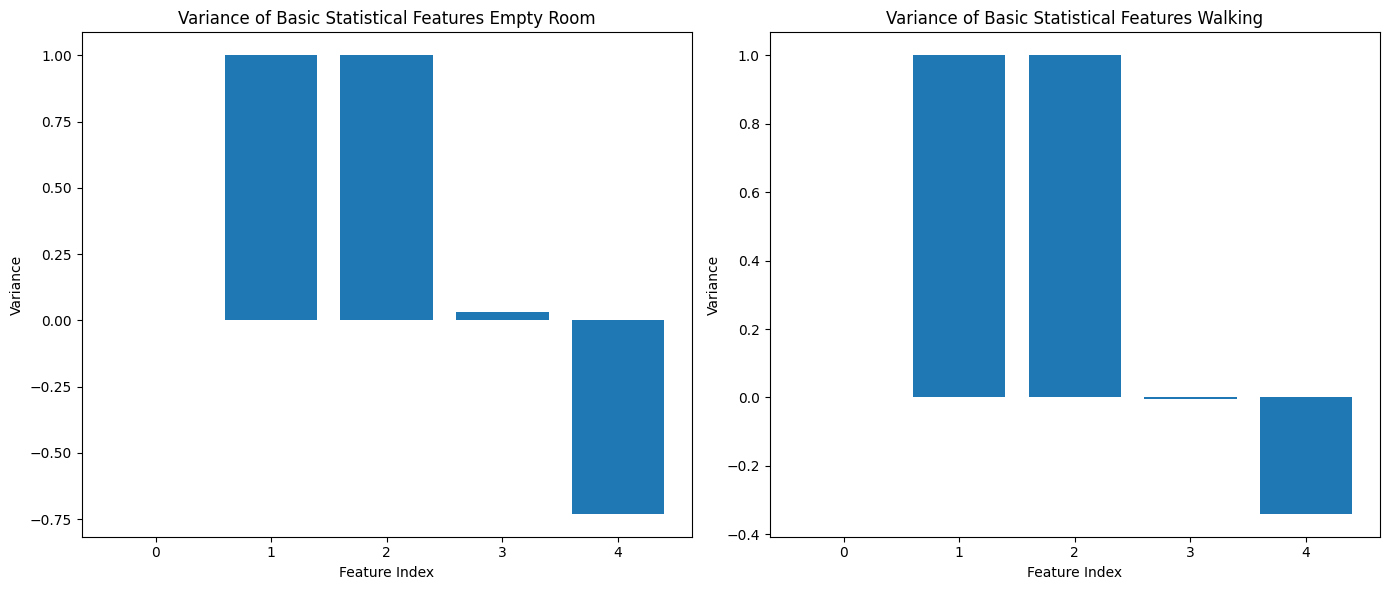

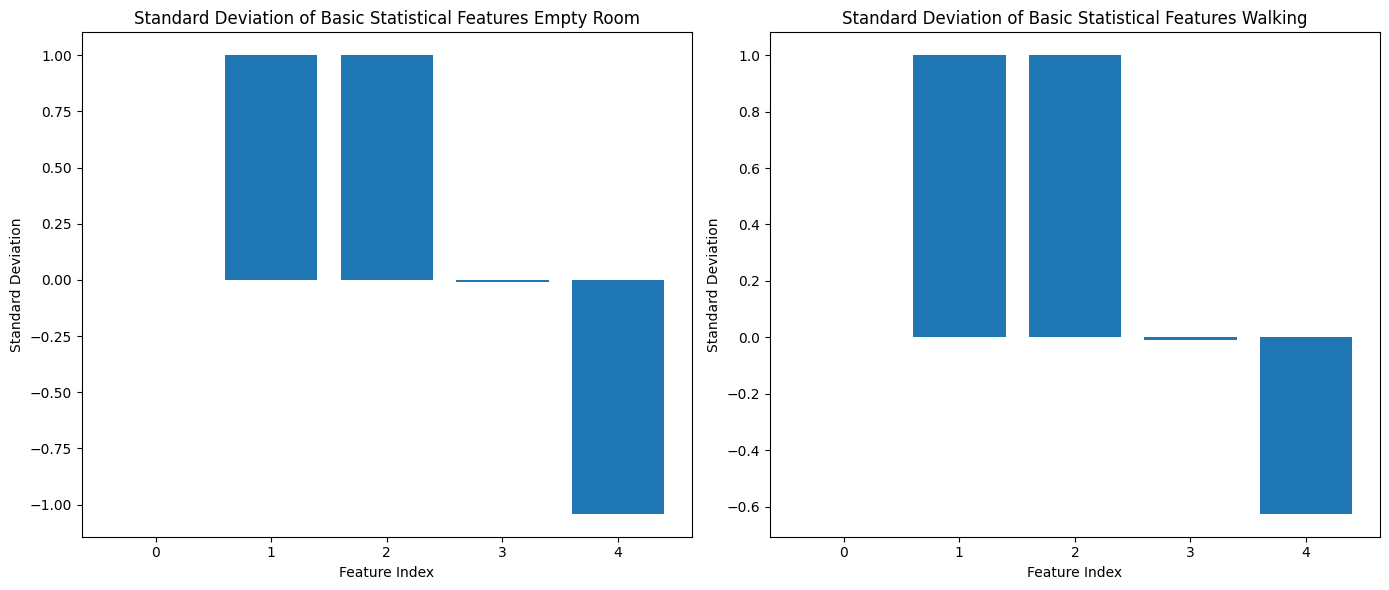

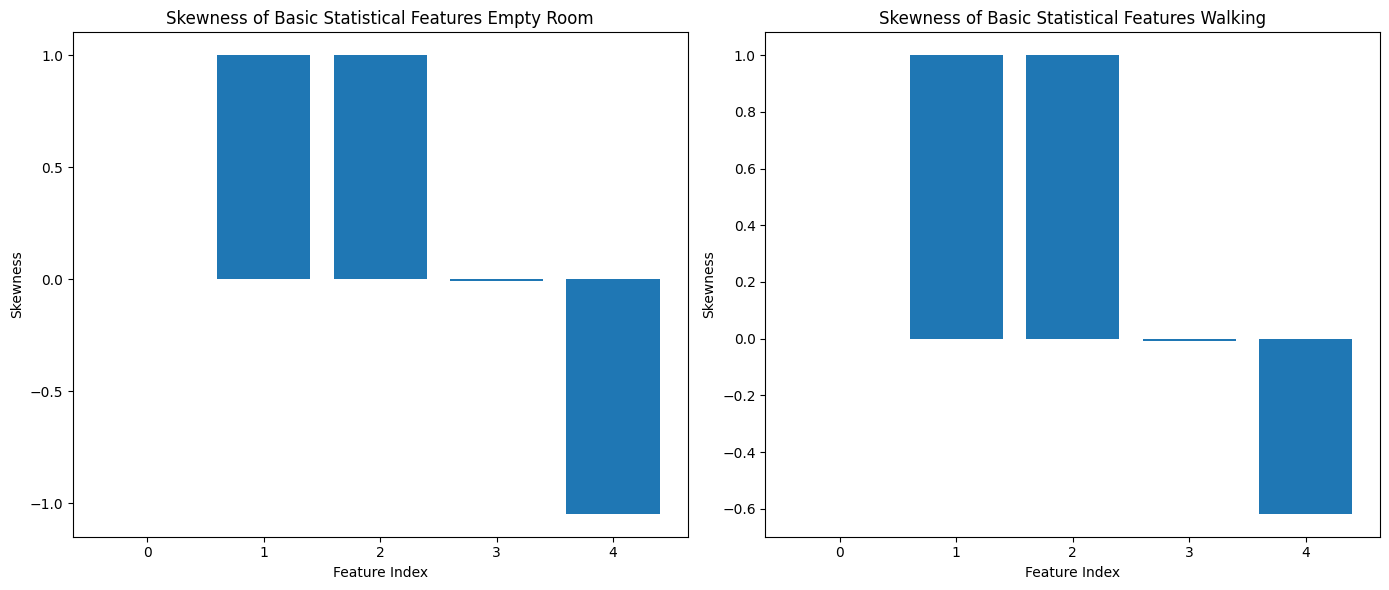

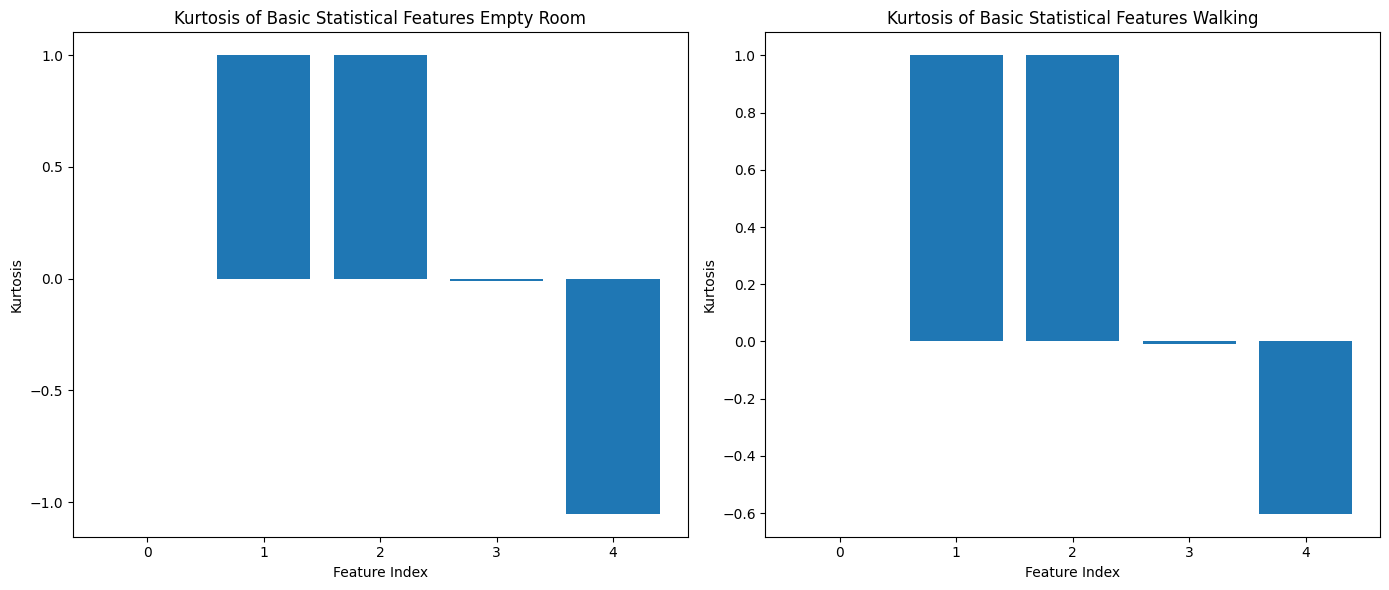

In [26]:
from scipy.stats import skew, kurtosis

# Calculate basic statistical features for each feature across all samples
mean_features_E = np.mean(standardized_csi_data_E, axis=0)
variance_features_E = np.var(standardized_csi_data_E, axis=0)
std_dev_features_E = np.std(standardized_csi_data_E, axis=0)
skewness_features_E = skew(standardized_csi_data_E, axis=0)
kurtosis_features_E = kurtosis(standardized_csi_data_E, axis=0)

mean_features_W = np.mean(standardized_csi_data_W, axis=0)
variance_features_W = np.var(standardized_csi_data_W, axis=0)
std_dev_features_W = np.std(standardized_csi_data_W, axis=0)
skewness_features_W = skew(standardized_csi_data_W, axis=0)
kurtosis_features_W = kurtosis(standardized_csi_data_W, axis=0)

# Combine these features into a single array for a basic feature set
basic_feature_set_E = np.array([mean_features_E, variance_features_E, std_dev_features_E, skewness_features_E, kurtosis_features_E])
basic_feature_set_W = np.array([mean_features_W, variance_features_W, std_dev_features_W, skewness_features_W, kurtosis_features_W])

# Transpose to align features as columns
basic_feature_set_E = basic_feature_set_E.T
basic_feature_set_W = basic_feature_set_W.T

# Check the shape of the basic feature set to confirm the extraction
basic_feature_set_shape_E = basic_feature_set_E.shape
basic_feature_set_shape_E
basic_feature_set_shape_W = basic_feature_set_W.shape
basic_feature_set_shape_W

# Plot the basic statistical features for the first 5 features
feature_indices = np.arange(5)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(feature_indices, basic_feature_set_E[0, :])
plt.title("Mean of Basic Statistical Features Empty Room")
plt.xlabel("Feature Index")
plt.ylabel("Mean")
plt.xticks(feature_indices)

plt.subplot(1, 2, 2)
plt.bar(feature_indices, basic_feature_set_W[0, :])
plt.title("Mean of Basic Statistical Features Walking")
plt.xlabel("Feature Index")
plt.ylabel("Mean")
plt.xticks(feature_indices)

plt.tight_layout()

plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(feature_indices, basic_feature_set_E[1, :])
plt.title("Variance of Basic Statistical Features Empty Room")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.xticks(feature_indices)

plt.subplot(1, 2, 2)
plt.bar(feature_indices, basic_feature_set_W[1, :])
plt.title("Variance of Basic Statistical Features Walking")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.xticks(feature_indices)

plt.tight_layout()

plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(feature_indices, basic_feature_set_E[2, :])
plt.title("Standard Deviation of Basic Statistical Features Empty Room")
plt.xlabel("Feature Index")
plt.ylabel("Standard Deviation")
plt.xticks(feature_indices)

plt.subplot(1, 2, 2)
plt.bar(feature_indices, basic_feature_set_W[2, :])
plt.title("Standard Deviation of Basic Statistical Features Walking")
plt.xlabel("Feature Index")
plt.ylabel("Standard Deviation")
plt.xticks(feature_indices)

plt.tight_layout()

plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(feature_indices, basic_feature_set_E[3, :])
plt.title("Skewness of Basic Statistical Features Empty Room")
plt.xlabel("Feature Index")
plt.ylabel("Skewness")
plt.xticks(feature_indices)

plt.subplot(1, 2, 2)
plt.bar(feature_indices, basic_feature_set_W[3, :])
plt.title("Skewness of Basic Statistical Features Walking")
plt.xlabel("Feature Index")
plt.ylabel("Skewness")
plt.xticks(feature_indices)
plt.tight_layout()

plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(feature_indices, basic_feature_set_E[4, :])
plt.title("Kurtosis of Basic Statistical Features Empty Room")
plt.xlabel("Feature Index")
plt.ylabel("Kurtosis")
plt.xticks(feature_indices)

plt.subplot(1, 2, 2)
plt.bar(feature_indices, basic_feature_set_W[4, :])
plt.title("Kurtosis of Basic Statistical Features Walking")
plt.xlabel("Feature Index")
plt.ylabel("Kurtosis")
plt.xticks(feature_indices)

plt.tight_layout()

plt.show()






